# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

([558455.892546468, 1454748.8880049167, 1679968.2434546144, 3075912.3341826918, 12854556.436565828], [558455.892546468, 1454748.8880049167, 1679968.2434546144, 3075912.3341826918, 12854556.436565828], [558455.892546468, 1454748.8880049167, 1679968.2434546144, 3075912.3341826918, 12854556.436565828])


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

**Zadanie Domowe **   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


In [2]:
a1, b1 = main.random_matrix_Ab(10)
a2, b2 = main.random_matrix_Ab(20)
a3, b3 = main.random_matrix_Ab(50)
a4, b4 = main.random_matrix_Ab(100)
a5, b5 = main.random_matrix_Ab(1000)

a_list = [a1, a2, a3, a4, a5]
b_list = [b1, b2, b3, b4, b5]

***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*
  

In [3]:
vector = [0, 0, 0, 0, 0]

#1
x1 = np.linalg.solve(a1, b1)
x2 = np.linalg.solve(a2, b2)
x3 = np.linalg.solve(a3, b3)
x4 = np.linalg.solve(a4, b4)
x5 = np.linalg.solve(a5, b5)

x_list = [x1, x2, x3, x4, x5]
#2
norm = vector[:]

norm[0] = main.residual_norm(a1, x1, b1)
norm[1] = main.residual_norm(a2, x2, b2)
norm[2] = main.residual_norm(a3, x3, b3)
norm[3] = main.residual_norm(a4, x4, b4)
norm[4] = main.residual_norm(a5, x5, b5)

for x in norm:
    print(x, "\n")

#3
cond = vector[:]
i = 0
for a in a_list:
    cond[i] = np.linalg.cond(a)
    i += 1
print(cond)

#4
#Wraz ze wzrostem wymiarów macierzy zwiększa się norma residuum oraz uwarunkowanie, onaczając jednocześnie utrate na jakości otrzymanych wyników

#5

time = np.zeros(len(a_list))


print("\nczas rozwiazania rownania\n")
for i in range(len(a_list)):
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(a_list[i], b_list[i])
    time[i] = saved_timing.average

print("\nobliczanie normy residuum\n")
for i in range(len(a_list)):
    saved_timing = %timeit -r 5 -n 10 -o main.residual_norm(a_list[i], x_list, b_list[i])
    time[i] = saved_timing.average

print("\nUwarunkowanie macierzy\n")
for i in range(len(a_list)):
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.cond(a_list[i])
    time[i] = saved_timing.average

9.922189323510324e-14 

8.603143935298084e-13 

4.672493859657243e-13 

1.1580094078827259e-11 

7.996667681658456e-09 

[121.88536038603995, 391.6577296269957, 822.512566572619, 3783.943711401974, 1117359.1859997758]

czas rozwiazania rownania

13.6 µs ± 1.69 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
69.5 µs ± 7.97 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
328 µs ± 47.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
992 µs ± 253 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
67.5 ms ± 18.4 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)

obliczanie normy residuum

1.65 µs ± 728 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.2 µs ± 265 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.16 µs ± 231 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.19 µs ± 263 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.14 µs ± 128 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)

Uwarunkowanie macierzy



***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [4]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [5]:
S1 = np.logspace(100, 1, num=3)


- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [6]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100

- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [7]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100



W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [8]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])
U,S,V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
print('Macierz pierwotna:')
print(A)

print('Macierz na podstawie wartości S1:')
print(A1)

print('Macierz na podstawie wartości S2:')
print(A2)

print('Macierz na podstawie wartości S3:')
print(A3)

Macierz pierwotna:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz na podstawie wartości S1:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S2:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S3:
[[-4.02045290e+99  3.94198798e+99  5.91298198e+99]
 [ 9.14289726e+99  1.91685719e+99  2.87528579e+99]
 [-4.93343857e+98  3.39935582e+99  5.09903374e+99]]


In [11]:
cond1 = vector[:]
cond2 = vector[:]
cond3 = vector[:]
matrixes1 = vector[:]
matrixes2 = vector[:]
matrixes3 = vector[:]

n_list = [10, 20, 50, 100, 1000]

s1_list = [main.log_sing_value(n, 0, 100) for n in n_list]
s2_list = [main.order_sing_value(n, 5, 'gre') for n in n_list]
s3_list = [main.order_sing_value(n, 5, 'low') for n in n_list]


for i in range(len(a_list)):
    matrixes1[i] = main.create_matrix_from_A(a_list[i], s1_list[i])
    matrixes2[i] = main.create_matrix_from_A(a_list[i], s2_list[i])
    matrixes3[i] = main.create_matrix_from_A(a_list[i], s3_list[i])




3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




In [16]:
#3
for i in range(len(a_list)):
    cond1[i] = np.linalg.cond(matrixes1[i])
    cond2[i] = np.linalg.cond(matrixes2[i])
    cond3[i] = np.linalg.cond(matrixes3[i])
#4


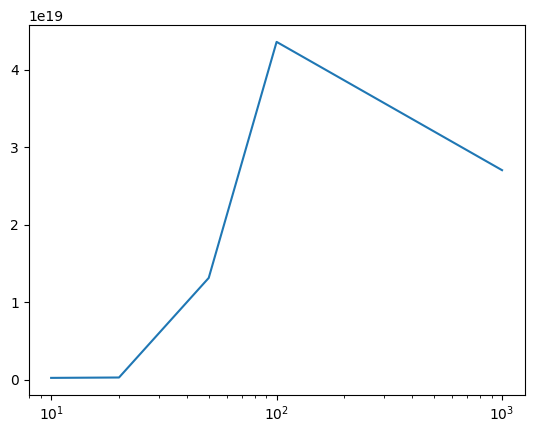

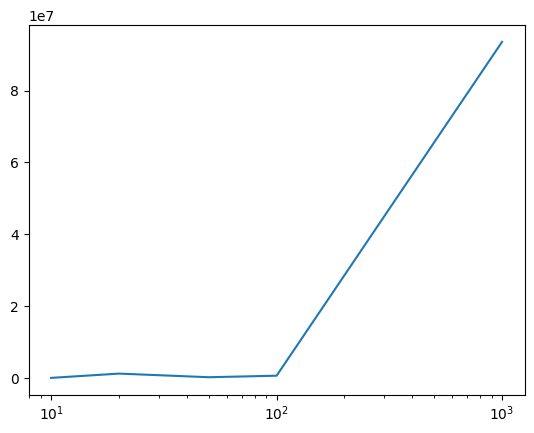

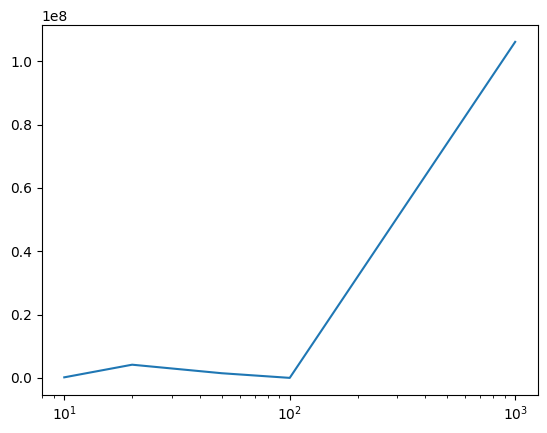

In [20]:

#5
plt.plot(n_list, cond1)
plt.xscale('log')
plt.show()

plt.plot(n_list, cond2)
plt.xscale('log')
plt.show()

plt.plot(n_list, cond3)
plt.xscale('log')
plt.show()



In [21]:

resi1 = vector[:]
resi2 = vector[:]
resi3 = vector[:]

for i in range(len(matrixes1)):
    x1_list = np.linalg.solve(matrixes1[i], s1_list)
    x2_list = np.linalg.solve(matrixes2[i], s2_list)
    x3_list = np.linalg.solve(matrixes3[i], s3_list)

for i in range(len(matrixes1)):
    resi1[i] = main.residual_norm(matrixes1[i], x1_list, s1_list)
    resi2[i] = main.residual_norm(matrixes2[i], x2_list, s2_list)
    resi3[i] = main.residual_norm(matrixes3[i], x3_list, s3_list)
    

c:\Users\revte\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new = asarray(a)


UFuncTypeError: Cannot cast ufunc 'solve1' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)